In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [3]:
data = pd.read_csv('GOOG.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/2/2015,26.378078,26.490770,26.133251,26.168653,26.168653,28951268
1,1/5/2015,26.091366,26.144720,25.582764,25.623152,25.623152,41196796
2,1/6/2015,25.679497,25.738087,24.983908,25.029282,25.029282,57998800
3,1/7/2015,25.280592,25.292759,24.914099,24.986401,24.986401,41301082
4,1/8/2015,24.831326,25.105074,24.482782,25.065184,25.065184,67071641


In [4]:
# Prepare the data
series = data['Close']  # Select the variable you want to analyze


In [5]:
# Create the state space model
model = sm.tsa.UnobservedComponents(series, 'local level')

In [6]:
# Fit the model to the data
model_fit = model.fit()

In [7]:
# Print the summary of the model fit
print(model_fit.summary())


                        Unobserved Components Results                         
Dep. Variable:                  Close   No. Observations:                 2108
Model:                    local level   Log Likelihood               -3800.269
Date:                Thu, 25 May 2023   AIC                           7604.538
Time:                        21:36:26   BIC                           7615.845
Sample:                             0   HQIC                          7608.679
                               - 2108                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular     0.0934      0.029      3.195      0.001       0.036       0.151
sigma2.level         1.9758      0.065     30.239      0.000       1.848       2.104
Ljung-Box (L1) (Q):         

In [8]:
# Access the estimated parameters
estimated_params = model_fit.params
print(estimated_params)

sigma2.irregular    0.093352
sigma2.level        1.975795
dtype: float64


In [9]:
# Access the predicted values
predicted_values = model_fit.predict(start=0, end=len(series)-1)


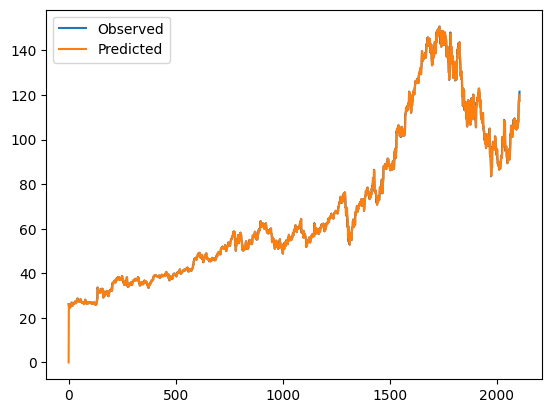

In [10]:
# Plot the observed and predicted values
import matplotlib.pyplot as plt
plt.plot(series, label='Observed')
plt.plot(predicted_values, label='Predicted')
plt.legend()
plt.show()